# 데이터 과학을 위한 통계
## ch1. 탐색적 데이터 분석
- 실험계획법, 최대우도추정법은 데이터 과학에 깊숙이 있다. 

### 1. 정형화된 데이터 요소
1. 수치형데이터
    - 연속형 데이터 : 연속되는 숫자(실수형)
    - 이산 데이터 : 정수값만 취할 수 있다. 
2. 범주형데이터
    - 이진 데이터 : 0,1/ 예 아니오 등, 두 가지로 대답할 수 있는 경우
    - 순서형 데이터 : 범주 안의 값들이 순위를 갖는 경우, 예) 평점
    
### 2. 테이블 데이터
1. 데이터 프레임
2. 피처 : 특징, 속성, 입력, 예측변수, 변수, 열
3. 결과 : 데이터 과학 프로젝트 목표는 대부분 어떤 결과를 에측하는 데 있다. 실험이나 결과를 예측하기 위해 피처를 사용한다. 
4. 레코드 : 행, 기록값, 사건, 사례, 예제, 관측값, 패턴, 샘플
5. 테이블 형식이 아닌 데이터 구조
    - 시계열 데이터 : 동일한 변수 안에 연속적인 측정값을 갖는다. 
    - 공간데이터 : 필드 정보에 공간을 나타내는 작은 단위들과 적당한 측정기준값에 중점을 둔다
    - 그래프 데이터 : 물리적 관계, 사회적 관계 등 네트워크를 표현, 네트워크 최적화, 추천시스템에서 유용

### 3. 위치추정 : 대푯값을 구해 대부분의 값들이 어디쯤에 위치하는지(중심경향성) 확인하기 위해 추정값을 구한다
1. 평균 : 모든 값의 총합을 개수로 나눈 값
    - 절사평균 : 값들을 크기 순으로 정렬한 후, 양끝에서 일정 개수의 값들을 삭제한 뒤 남은 값들을 가지고 구한 평균
    - 가중평균 : 각 데이터 값에 가중치를 곱한 값들의 통합을 다시 가중치의 총합으로 나눈 평균
        - 어떤 값들이 본래 다른 값들에 비해 큰 변화량을 가질 때, 가중치를 부여할 수 있다. 
        - 데이터 수집 시, 정확히 같은 비율을 반영하는 데이터를 수집하기 어렵다. 이를 데이터가 부족한 소수그룹에 대해 더 높은 가중치를 적용하여 해결
2. 중간값 : 데이터를 일렬로 정렬했을 때 한가운데에 위치한 값으로, 결과를 왜곡할 수 있는 특잇값의 영향을 받지 않는 로버스트한 위치추정방법이다. 
    - 가중중간값 : 가운데 위치한 값이 아닌, 어떤 위치를 기준으로 상위 절반의 가중치의 핪이 하위 절반의 가중치 합과 동일한 위치의 값이 된다. 특잇값에 영향의 덜 받는다. 
    - 특잇값: 극단값, 이상치
    - 이상검출 : 대부분의 정상적인 데이터보다는 예외적으로 측정된 특잇값들에 관심이 있다. 

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv("./winequality-red.csv",sep = ";")

In [20]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#평균
wine["quality"].mean()

5.6360225140712945

In [19]:
#절사평균
# 이때 trim 옵션에 0.1을 주면 각 끝에서 10%를 제외한 값의 평균을 구한 것이다. 이 경우, 평균보다 절사평균이 더 작다
# = 이상값이 있었다는 것
stats.trim_mean(wine["quality"], 0.1)

5.588602654176425

In [10]:
#중앙값
wine["quality"].median()

6.0

In [21]:
#가중 평균
# 알코올에 따라 퀄리티 값의 평균을 계산했다. 
np.average(wine["quality"], weights=wine['alcohol'])

5.675313830962788

### 4. 변이 추정 : 데이터 값이 얼마나 밀집해 있는지 혹은 퍼져 있는지를 나타내는 산포도
1. 표준편차 : 데이터가 얼마나 차이가 있는지? 어떻게 밀집해있는지?
    - 편차(= 오차, 잔차) : 관측데이터와 위치추정값 사이의 차이, 데이터가 중앙값을 중심으로 주변으로 얼마나 퍼져있는지 보여준다. 
    - 편차들의 대푯값을 추정하여 변이를 측정하고자 하는 방법
        - 평균절대편차 : 평균과의 편차의 절댓값의 평균  
        - 분산(= 평균제곱오차) : 평균과의 편차를 제곱한 값들의 합을 n-1로 나눈 값
        - 표준편차 : 분산의 제곱근
        - 중위절대편차 : 중간값과의 편차의 절댓값의 중간값, 특잇값에 민감하지 않음
    - 자유도 : 추정값을 계산할 때 제약조건의 개수를 의미, 분산수식에 n을 분모로 이용하면 모집단의 분석과 표준편차와의 참값을 과소평가하게 된다. 그렇게 되면 편향추정이 나타나지만, 자유도를 분모로 사용하면 비편향 추정이 된다.  
    * 분산, 표준편차, 평균절대편차, 중위절대편차 모두 동일한 추정은 아니지만, 모두 데이터가 정규분포에서 왔다고 가정한다. 

2. 백분위수 : 정렬된 데이터가 얼마나 퍼져있는가?
    - 순서통계량 : 정렬데이터를 나타내는 통계량
        - 범위 : 가장 큰 값과 작은 값의 차이
    - 백분위수 : 범위의 양 끝값을 지운 후 범위를 알아내는 방법으로 데이터를 100으로 나누어 그 퍼센테이지 범위를 추정하는 방법이다. 50번째 백분위수 = 중간값
    - 사분위수 : 25번째 백분위수와 75번째 백분위수의 차이를 보는 것이다. 

In [3]:
#분산
np.var(wine["quality"])

0.6517605398308277

In [4]:
#표준편차
np.std(wine["quality"])

0.8073168769639513

In [5]:
# 사분위수 : 25번째분위수와 75번째 분위수의 차이
stats.iqr(wine["quality"])

1.0

In [7]:
# 중위절대표준편차
def get_median_absolute_deviation(data):
    return np.median(np.absolute(data - np.median(data, axis=0)), axis=0)
#np.absolute :  절댓값
get_median_absolute_deviation(wine["quality"])

1.0

### 5. 데이터 분포 탐색하기
1. boxplot
2. 도수분포표와 히스토그램
    - 도수분포표: 구간의 크기가 같도록, 즉 구간안에 다른 개수의 데이터가 오도록 하는 방식으로 보여준다. 
    - 히스토그램 : 도수분포표를 시각화하는 방법, y축에 홋수를 , x축에 변수 값들을 표시하는 방식
        - 그래프에 빈 공간이 있을 수 있다. 
        - 구간은 동일한 크기를 갖는다
        - 구간의 수는 사용자가 정할 수 있다. 
        - 빈 구간이 있지 않은 이상, 막대 사이의 공간없이 서로 붙어 있다. 
    - 통계학 이론에서 위치와 변이는 각각 분포의 일차 및 이차 적률(모멘트)이라고 한다. 삼차, 사차 모멘트는 각각 왜도와 첨도라고 부른다. 왜도는 데이터가 얼마나 비스듬히 쏠려있는지, 첨도는 극단값을 갖는 경향성을 보여준다. 
3. 밀도추정

In [8]:
#전체 백분위수 계산
np.percentile(wine["quality"], [0, 25, 50, 75, 100], interpolation='nearest')

array([3, 5, 6, 6, 8], dtype=int64)

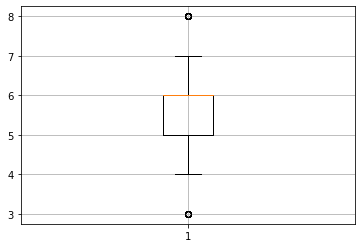

In [11]:
plt.figure()
plt.boxplot(wine["quality"])
plt.grid()
plt.show()

#위아래로 나 있는 점선 : 수염, 데이터 전체 범위를 나타내는 위 아래 선들로 연결되어 있다. 
# 중위값은 진한 선 혹은 빨간 선으로 표시된다
# 이 경우 wine["quality"]의 범위는 4~7이고, 25%는 5, 50%, 75%는 6으로 알 수 있다. 

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <a list of 10 Patch objects>)

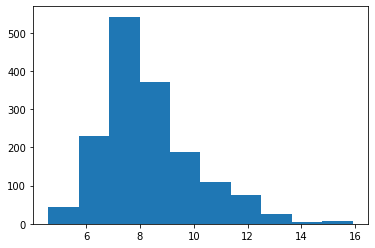

In [17]:
plt.hist(wine["fixed acidity"])

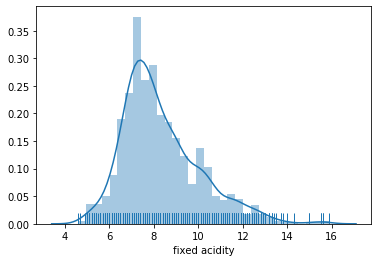

In [19]:
# 밀도추정
sns.distplot(wine["fixed acidity"], rug=True)
plt.show()

### 6. 이진데이터와 범주데이터 탐색
1. 최빈값 : 데이터에서 가장 자주 등장하는 범주 혹은 값
2. 기댓값 : 범주에 해당하는 어떤 수치가 있을 때, 범주의 출현확률에 따른 평균
    - 각 결과값과 발생확률을 곱하여 모두 더한 값은 가중평균과 같은 꼴이다(가중치를 곱하여 나눈다는 의미에서)
* 범주란 전혀 다른 집합, 정도를 나타내는 요인변수의 수준, 혹은 구간별로 나뉜 수치 데이터를 의미한다. 

### 7. 상관관계
1. 상관관계
    - 상관계수 : 수치적 변수들 간에 어떤 관계가 있는지를 나타내기 위해 사용되는 측정량, -1 ~ +1, r = x 와 y 가 함께 변하는 정도 / x 와 y 가 각각 변하는 정도
        - 양의 상관관계, 음의 상관관계
        - 상관계수가 0이라는 것은 아무런 상관성이 없다는 것이다. 하지만 데이터를 랜덤하게 재배치하면 우연히 상관관계를 보일 때가 있으므로, 주의해야 한다. 
    - 상관행렬 : 행과 열이 변수들을 의미하는 표, 각 셀은 그 행과 열에 해당하는 변수들간의 상관관계를 의미한다. 
2. 산점도 : x축과 y축이 서로 다른 두 개의 변수를 나타내는 도표이다. 

In [22]:
df = wine[["fixed acidity","quality"]]
corr = df.corr(method = 'pearson')
print(corr)

               fixed acidity   quality
fixed acidity       1.000000  0.124052
quality             0.124052  1.000000


In [23]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


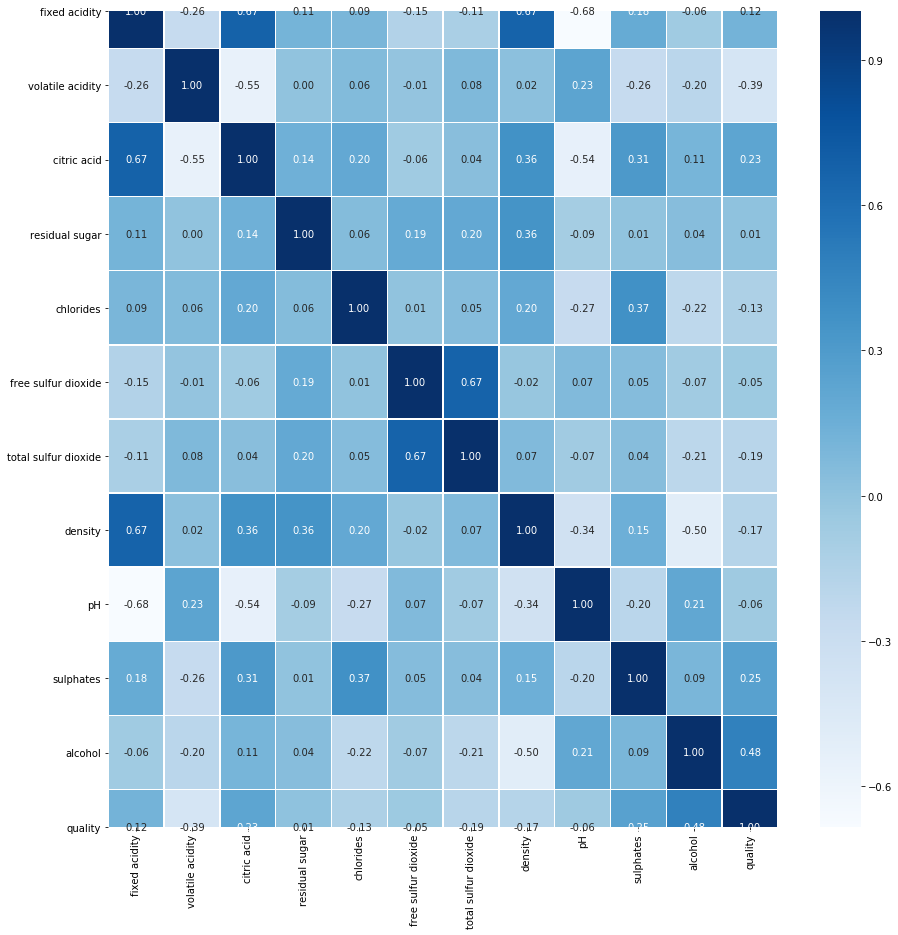

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data = wine.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

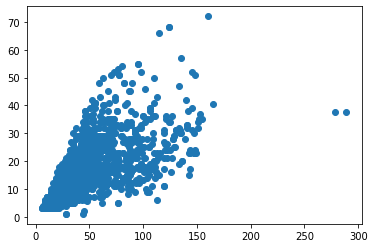

In [27]:
plt.scatter(wine["total sulfur dioxide"],wine["free sulfur dioxide"])

- 평균, 분산 등 하나의 피처만 다루는 것은 일변량분석이라고 한다

### 8. 두 개 이상의 변수 탐색하기 = 이변량분석, 다변량분석
1. 육각형 구간과 등고선 : 수치형변수 VS 수치형변수를 시각화
    - 육각형구간 : 기록값들을 육각형모양의 구간들로 나누고 각 구간에 포함된 기록값의 개수에 따라 색깔을 표시한다.  
    - 이차원상의 밀도를 표시할 때 : 육각 구간, 히트맵, 등고도표 등 이용이 가능하다
    - 데이터의 방대한 양에 압도당하지 않으면서 전체적인 추이를 확인하고, 비교할 수 있는 유용한 도구이다. 

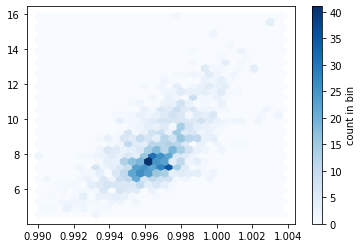

In [31]:
plt.hexbin(wine["density"],wine["fixed acidity"], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

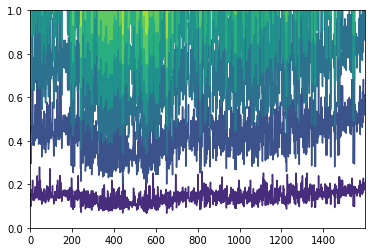

In [38]:
two = np.array([wine["density"],wine["fixed acidity"]])
plt.contour(two)

2. 범주형 변수 VS 범주형 변수
    - 분할표 : 두 범주형 변수를 요약하는 데에 효과적인 방법, 범주별 빈도수를 기록한 표 =  두 범주형변수의 도수를 확인하기 위한 방법

In [39]:
pd.crosstab(wine["quality"],wine['pH'],margins = True)
# 범주형 변수끼리 해야 하는데, 이 경우 범주형은 퀄리티뿐이었다 ㅠㅜㅠ

pH,2.74,2.86,2.87,2.88,2.89,2.9,2.92,2.93,2.94,2.95,...,3.7,3.71,3.72,3.74,3.75,3.78,3.85,3.9,4.01,All
quality,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,53
5,0,0,0,1,2,0,3,1,2,0,...,0,0,2,1,0,0,0,0,0,681
6,0,1,1,0,2,1,0,2,2,0,...,1,1,0,0,0,1,1,1,2,638
7,0,0,0,0,0,0,1,0,0,1,...,0,3,0,0,0,1,0,0,0,199
8,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,18
All,1,1,1,2,4,1,4,3,4,1,...,1,4,3,1,1,2,1,2,2,1599


3. 범주형 변수 VS 수치형 변수
    - 박스플롯
    - 바이올린 도표
4. 다변수 시각화하기
    - 조건화를 이용해 두 변수 비교용 도표를 확장해서 시각화할 수 있다. 